# **Concrete Compressive Strength**

# **Dataset Description**


The dataset for this competition (both train and test) was generated from a deep learning model trained on the Concrete Strength Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Description of Fields is as follows:-**

1. CementComponent:- Amount of cement is mixed
2. BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
3. FlyAshComponent:- Amount of FlyAsh is mixed
4. WaterComponent:- Amount of water is mixed
5. SuperplasticizerComponent:- Amount of Super plasticizer is mixed
6. CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
7. FineAggregateComponent:- Amount of Coarse Aggregate is mixed
8. AgeInDays:- How many days it was left dry
9. Strength:- What was the final strength of concrete

# **Data Gathering**

In [1]:
# Import packadges
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set(font_scale=1.0)

/kaggle/input/concrete-data-yeh/Concrete_Data_Yeh.csv


In [2]:
# Load the dataset
df=pd.read_csv("/kaggle/input/concrete-data-yeh/Concrete_Data_Yeh.csv")
print("Whole dataset: ")
df

Whole dataset: 


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [4]:
df.rename(columns={
    'cement': 'CementComponent',
    'slag': 'BlastFurnaceSlag',
    'flyash': 'FlyAshComponent',
    'water': 'WaterComponent',
    'superplasticizer': 'SuperplasticizerComponent',
    'coarseaggregate': 'CoarseAggregateComponent',
    'fineaggregate': 'FineAggregateComponent',
    'age': 'AgeInDays',
    'csMPa': 'Strength'
}, inplace=True)

# **Exploratory Data Analysis**

In [5]:
# Display the Initial rows in dataset
print("Initial rows in in dataset:")
df.head()

Initial rows in in dataset:


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Get the dimensions of the Dataset
print("Dimensions of the Dataset (Rows, Columns):")
df.shape

Dimensions of the Dataset (Rows, Columns):


(1030, 9)

In [7]:
# Removing any leading, and trailing whitespaces in columns
df.columns = df.columns.str.strip()

In [8]:
# Getting an overview of the features and their types in the dataset
print("Overview of the features and their types:")
df.info()

Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB



> Dataset has 1030 rows, 9 columns/ features


> There aren't any null values

> All features are numeric

> We have 9 columns:
*   8 features
*   Label **Strength**

In [9]:
# Getting a statistical summary of the dataset: numerical features
print("Statistical summary of numeric features:")
df.describe().T

Statistical summary of numeric features:


,count,mean,std,min,25%,50%,75%,max
CementComponent,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAshComponent,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
WaterComponent,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
SuperplasticizerComponent,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregateComponent,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregateComponent,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
AgeInDays,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

     CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
77             425.0             106.3              0.0           153.5   
80             425.0             106.3              0.0           153.5   
86             362.6             189.0              0.0           164.9   
88             362.6             189.0              0.0           164.9   
91             362.6             189.0              0.0           164.9   
100            425.0             106.3              0.0           153.5   
103            425.0             106.3              0.0           153.5   
109            362.6             189.0              0.0           164.9   
111            362.6             189.0              0.0           164.9   
123            425.0             106.3              0.0           153.5   
126            425.0             106.3              0.0           153.5   
132            362.6             189.0              0.0           164.9   
134            362.6     

In [11]:
# Count duplicates
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 25


> We have duplicated rows in Dataset (25)

In [12]:
# Drop duplicates
df = df.drop_duplicates()

In [13]:
# Get the dimensions of the Dataset after dropping duplicates
print("Dimensions of the Dataset after dropping duplicates (Rows, Columns):")
df.shape

Dimensions of the Dataset after dropping duplicates (Rows, Columns):


(1005, 9)

In [14]:
# Check nulls
nulls_summary = pd.DataFrame({
    'Nulls': df.isnull().any(),
    'Num_of_nulls [qty]': df.isnull().sum(),
    'Num_of_nulls [%]': round(df.isnull().mean()*100, 2)
})
print(nulls_summary)

                           Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
CementComponent            False                   0               0.0
BlastFurnaceSlag           False                   0               0.0
FlyAshComponent            False                   0               0.0
WaterComponent             False                   0               0.0
SuperplasticizerComponent  False                   0               0.0
CoarseAggregateComponent   False                   0               0.0
FineAggregateComponent     False                   0               0.0
AgeInDays                  False                   0               0.0
Strength                   False                   0               0.0


In [15]:
# Checking number of unique values in each feature
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

CementComponent: Number of unique values 278
BlastFurnaceSlag: Number of unique values 185
FlyAshComponent: Number of unique values 156
WaterComponent: Number of unique values 195
SuperplasticizerComponent: Number of unique values 111
CoarseAggregateComponent: Number of unique values 284
FineAggregateComponent: Number of unique values 302
AgeInDays: Number of unique values 14
Strength: Number of unique values 845


In [16]:
df['Strength'].value_counts()

Strength
41.05    4
33.40    4
23.52    4
31.35    4
18.13    3
        ..
23.80    1
38.77    1
51.33    1
56.85    1
32.77    1
Name: count, Length: 845, dtype: int64

# Univariate Analysis

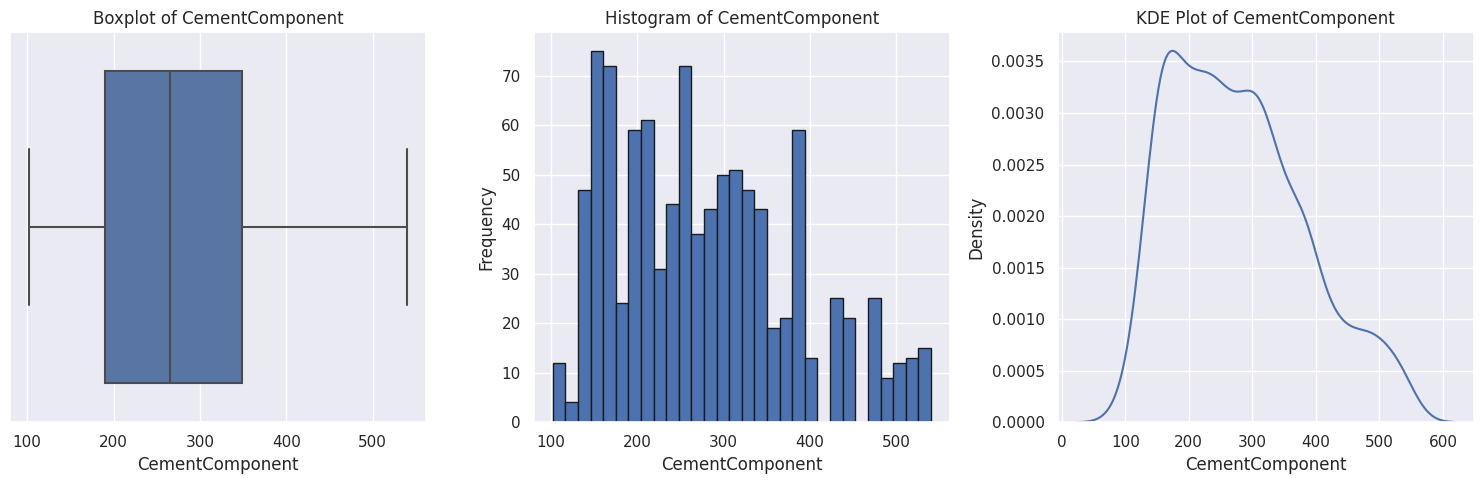

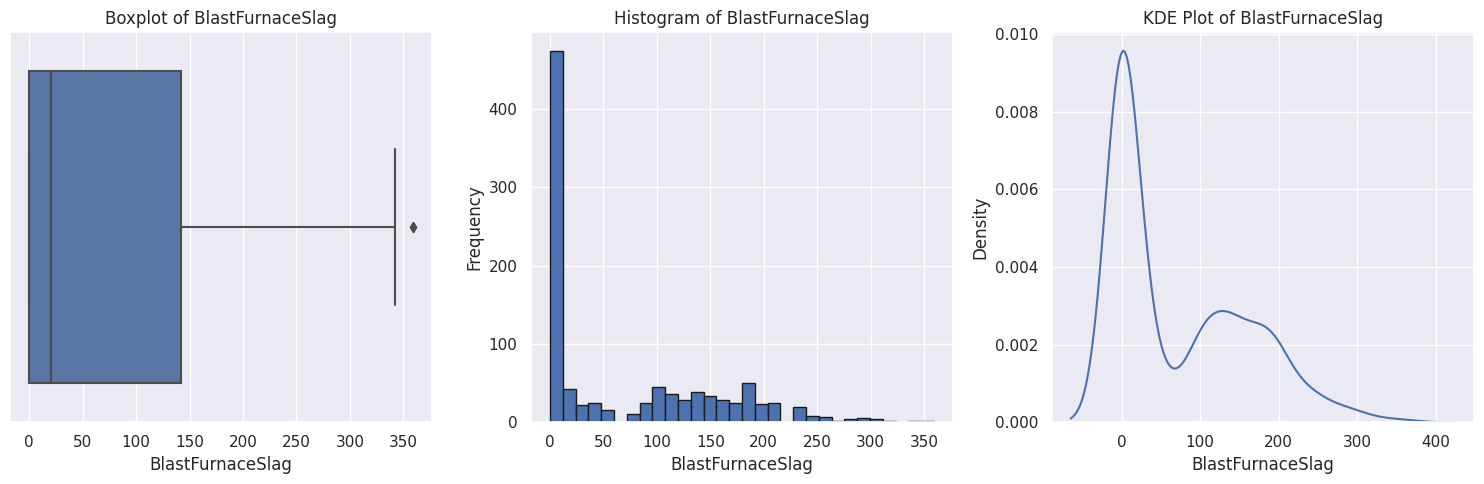

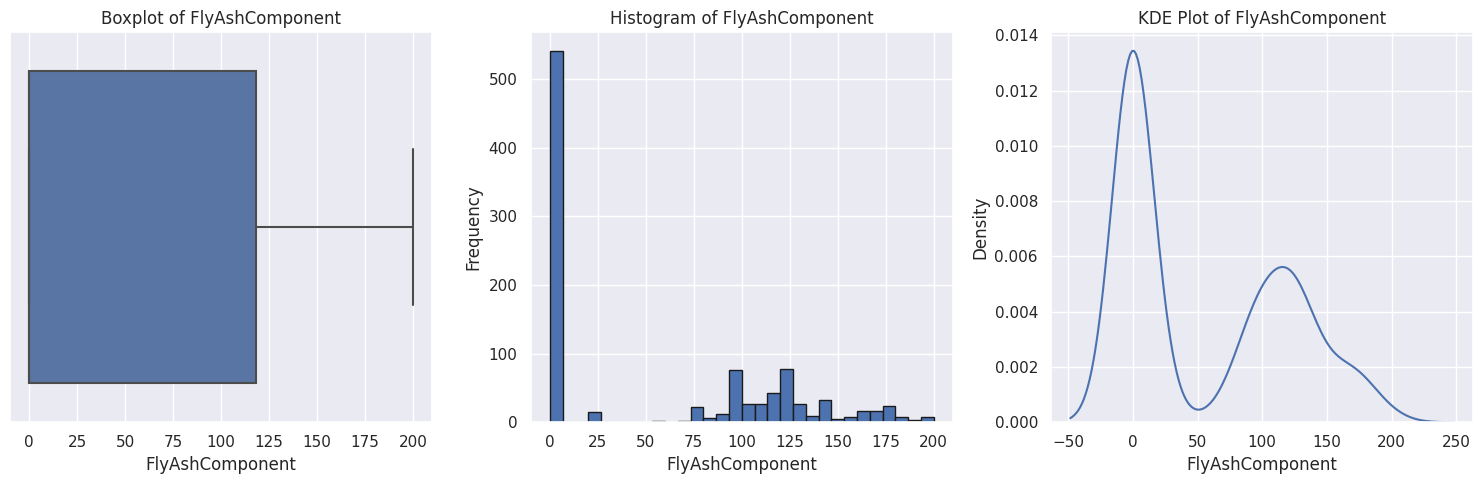

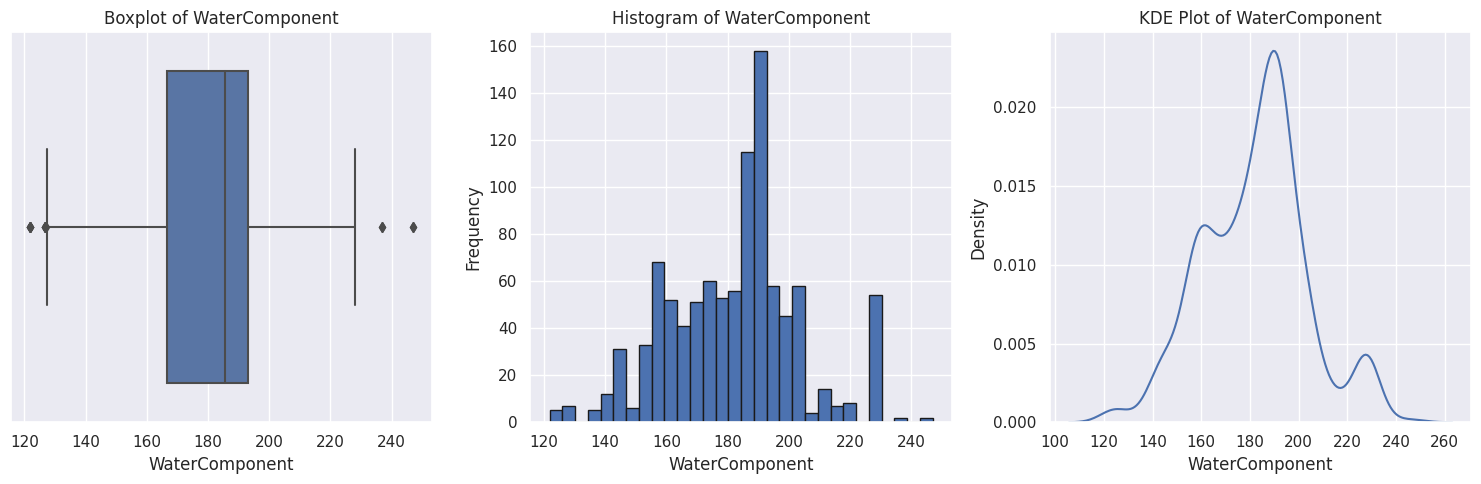

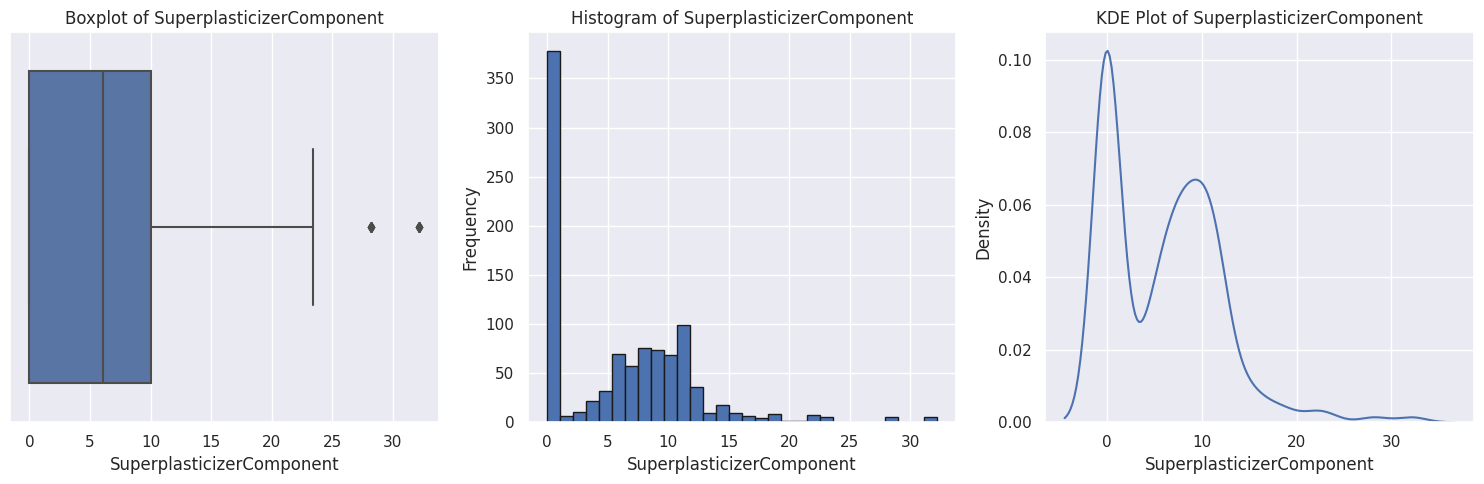

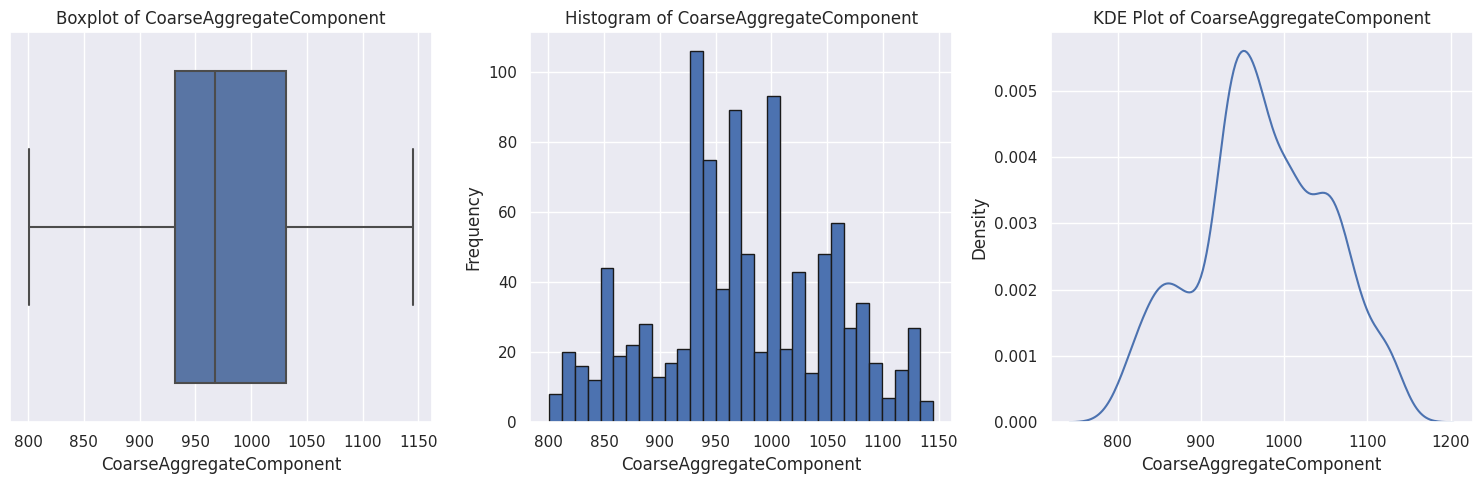

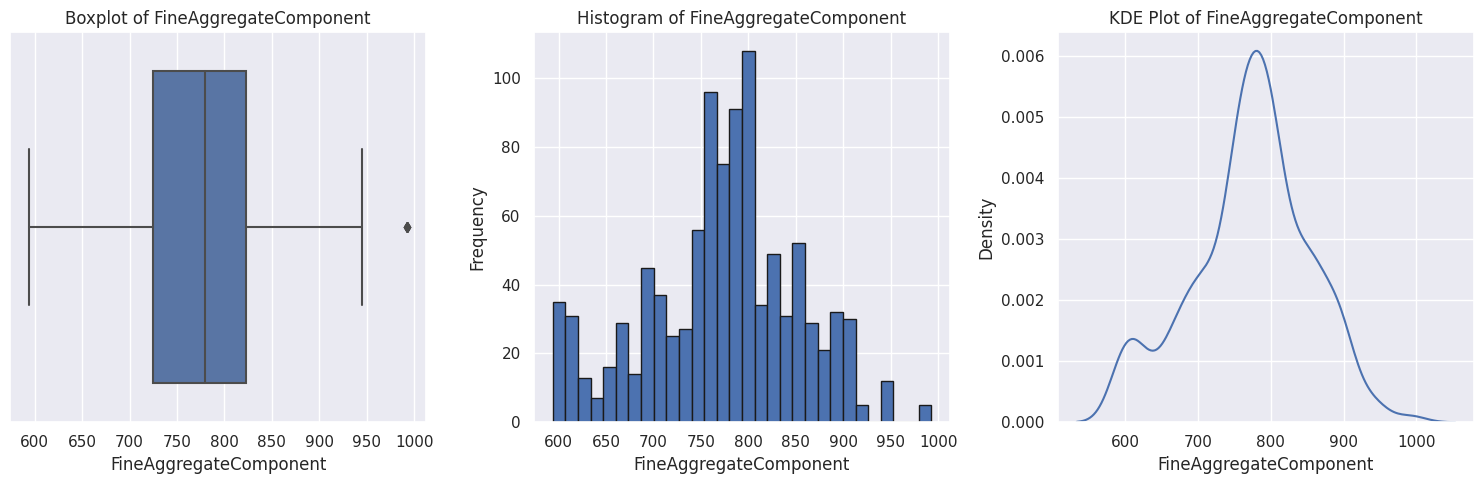

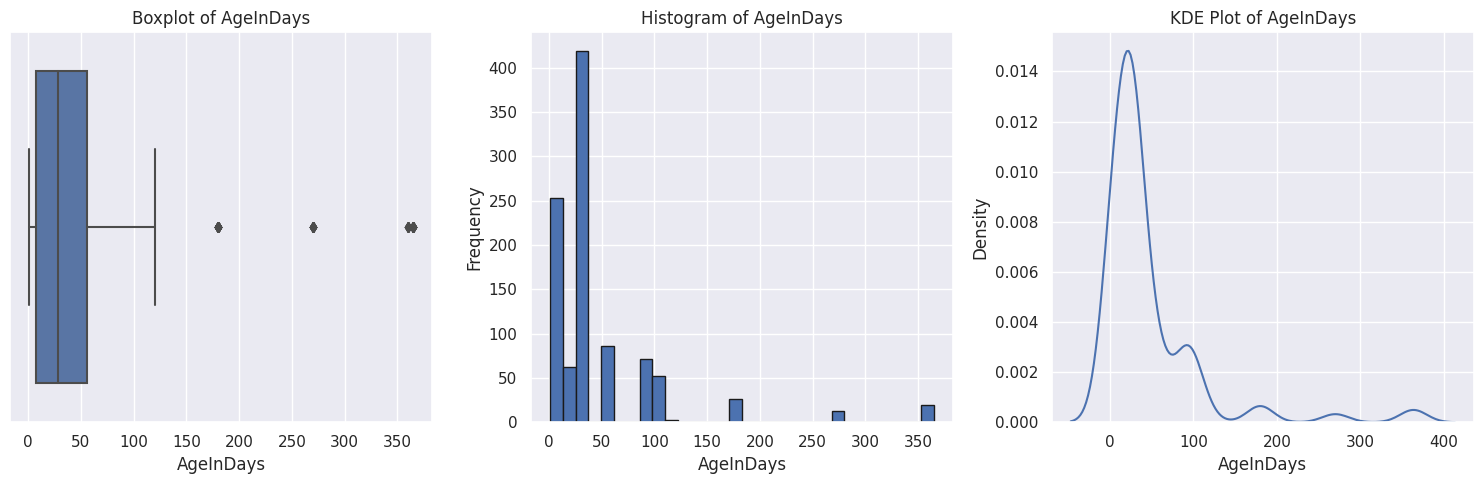

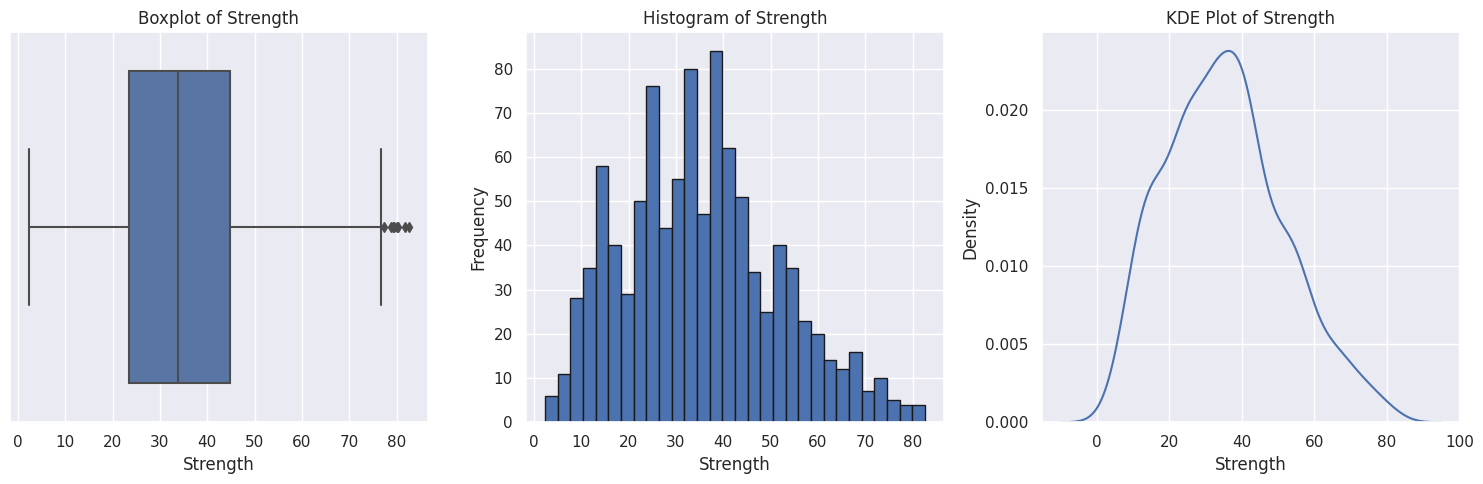

In [17]:
# Plot the distribution for all the numerical features.
for col in df.columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    sns.boxplot(data=df, x=col, ax=ax[0])
    ax[0].set_title(f'Boxplot of {col}')

    ax[1].hist(df[col].dropna(), bins=30, edgecolor='k')
    ax[1].set_title(f'Histogram of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Frequency')

    sns.kdeplot(data=df, x=col, ax=ax[2])
    ax[2].set_title(f'KDE Plot of {col}')

    plt.tight_layout()
    plt.show()

> There are some outliers in some features

> Features' Distribution is not exactly symmetric

In [18]:
df['Strength'] = df['Strength'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 78.5 KB


In [20]:
df['Strength'].value_counts()

Strength
33    42
39    36
37    28
24    28
31    27
      ..
77     1
81     1
78     1
2      1
3      1
Name: count, Length: 80, dtype: int64

In [21]:
data = df['Strength'].tolist()

fig = go.Figure(
    go.Histogram(x=data, nbinsx=10, marker_color='deepskyblue')
)

fig.update_layout(
    title='Histogram of Strength',
    xaxis_title='Strength Values',
    yaxis_title='Frequency'
)

fig.show()

> For a while,, you may think that Concrete with Low Compressive Strength is weak and not valid

> Let's discover the materials that makes the Compressive Strength of Concrete Low

In [22]:
df[df['Strength'] < 5]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
651,183.9,122.6,0.0,203.5,0.0,959.2,800.0,3,4
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2
705,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4


> Based on the data where Strength is less than 5, it seems that the concrete mixes consume a relatively low amount of cementitious material.
1.   **No Fly Ash or Superplasticizer**: The absence of FlyAshComponent and SuperplasticizerComponent indicates that these common supplementary cementitious materials are not being used. These materials are typically added to replace part of the cement, improving properties like strength and durability, while also reducing the overall cement consumption
2.   **Coarse Aggregate and Water Dominance**: The high CoarseAggregateComponent and relatively high WaterComponent suggest that more aggregate and water are being used in the mix, which may dilute(يقلل) the amount of cement needed. This could further reduce costs but also results in low strength, as indicated by the early testing at 3 days

# Does the concrete with 5Mpa Not Valid or bad?

The concrete industry is not only limited to buildings, but there are many other things that we will discover later.


> Concrete mixes with low strength that consume little cement are likely aimed at non-structural applications or situations where cost is prioritized over strength. For example, such mixes could be used for pavements, pathways, or backfill where high strength is not a critical requirement.

**Little amount of Cement,, What about the long term of using this Concrete?**

While using less cement can seem like a short-term cost-saving measure, it can lead to significant long-term problems.
1. Increased Porosity
2. Increased Shrinkage and Cracking
3. Increased Permeability
4. Increased Maintenance Costs

# What about when Strength is very high?

In [23]:
df[df['Strength'] > 70]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79
69,485.0,0.0,0.0,146.0,0.0,1120.0,800.0,28,71
129,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71
130,323.7,282.8,0.0,183.8,10.3,942.7,659.9,28,74
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74
144,475.0,118.8,0.0,181.1,8.9,852.1,781.5,56,72
151,401.8,94.7,0.0,147.4,11.4,946.8,852.1,56,73
152,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80
156,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,56,72


> Based on the data where Strength is greater than 70:
1.   Rows with higher CementComponent tend to show higher strength, indicating a positive correlation between cement content and compressive strength.
2.   Rows with SuperplasticizerComponent appear to have higher strengths in general, suggesting that superplasticizers enhance compressive strength.
3. Concrete strength appears to increase with age, which is consistent with the general property of concrete gaining strength over time.
  * For example, concrete aged 56 or 91 days typically has higher strength values than those aged 28 days.

**Fantastic!!** Do you know what are these concretes used for??


> Ultra-High-Strength Concrete, used in highly specialized, large-scale projects, such as nuclear reactors or specialized marine structures.

In [24]:
# Combine the counts and ratios of Strength ranges
bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
labels = ['M0:M10', 'M10:M15', 'M15:M20', 'M20:M25', 'M25:M30',
          'M30:M35', 'M35:M40', 'M40:M45', 'M45:M50', 'M50:M55',
          'M55:M60', 'M60:M65', 'M65:M70', 'M70:M75', 'M75:M80', 'M80:M85']

df['StrengthCategory'] = pd.cut(df['Strength'], bins=bins, labels=labels, include_lowest=True)

strength_counts = df['StrengthCategory'].value_counts().sort_index()

strength_ratios = df['StrengthCategory'].value_counts(normalize=True).sort_index() * 100

strength_summary = pd.DataFrame({
    'Count': strength_counts,
    'Ratio (%)': strength_ratios})

print(strength_summary)

                  Count  Ratio (%)
StrengthCategory                  
M0:M10               52   5.174129
M10:M15              89   8.855721
M15:M20              65   6.467662
M20:M25             115  11.442786
M25:M30              91   9.054726
M30:M35             126  12.537313
M35:M40             131  13.034826
M40:M45              97   9.651741
M45:M50              58   5.771144
M50:M55              68   6.766169
M55:M60              39   3.880597
M60:M65              25   2.487562
M65:M70              23   2.288557
M70:M75              16   1.592040
M75:M80               8   0.796020
M80:M85               2   0.199005


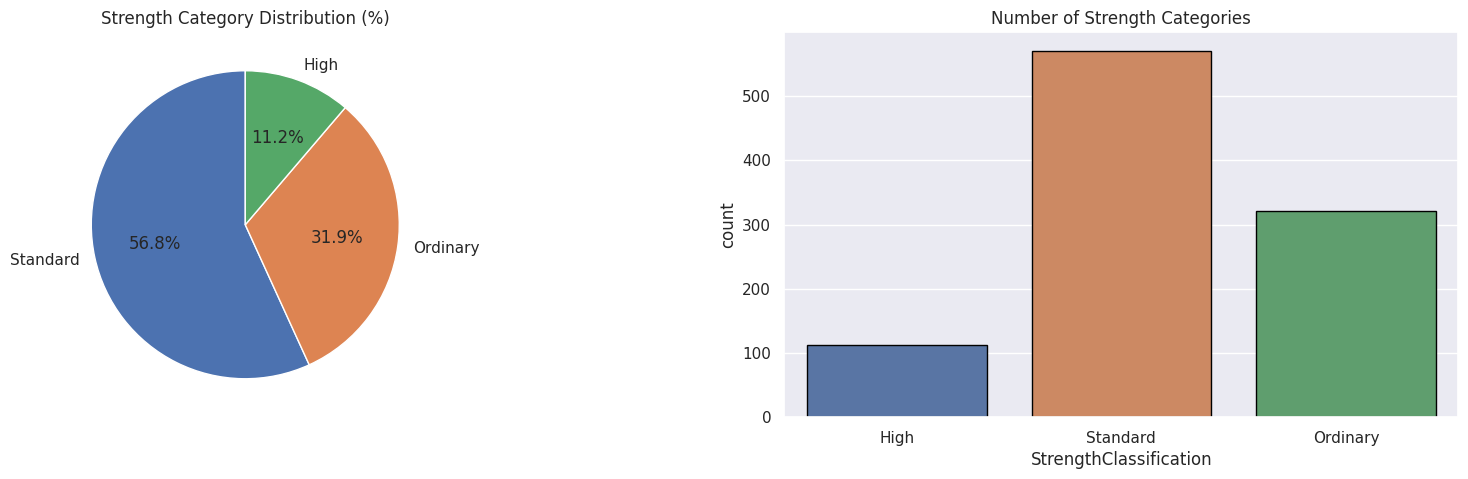

In [25]:
def map_to_broader_group(strength_category):
    if strength_category in ['M0:M10', 'M10:M15', 'M15:M20', 'M20:M25']:
        return 'Ordinary'
    elif strength_category in ['M25:M30', 'M30:M35', 'M35:M40', 'M40:M45', 'M45:M50', 'M50:M55']:
        return 'Standard'
    else:
        return 'High'

df['StrengthClassification'] = df['StrengthCategory'].apply(map_to_broader_group)

category_counts = df['StrengthClassification'].value_counts()
category_ratios = df['StrengthClassification'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].pie(category_ratios, labels=category_ratios.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Strength Category Distribution (%)')

sns.countplot(x='StrengthClassification', data=df, ax=ax[1], edgecolor='black')
ax[1].set_title('Number of Strength Categories')

plt.subplots_adjust(wspace=0.3)
plt.show()



> About 32% of concrete that used is Ordinary strength concrete grades

> About 57% of concrete that used is Standard grades

> About 11% of concrete is  High grades



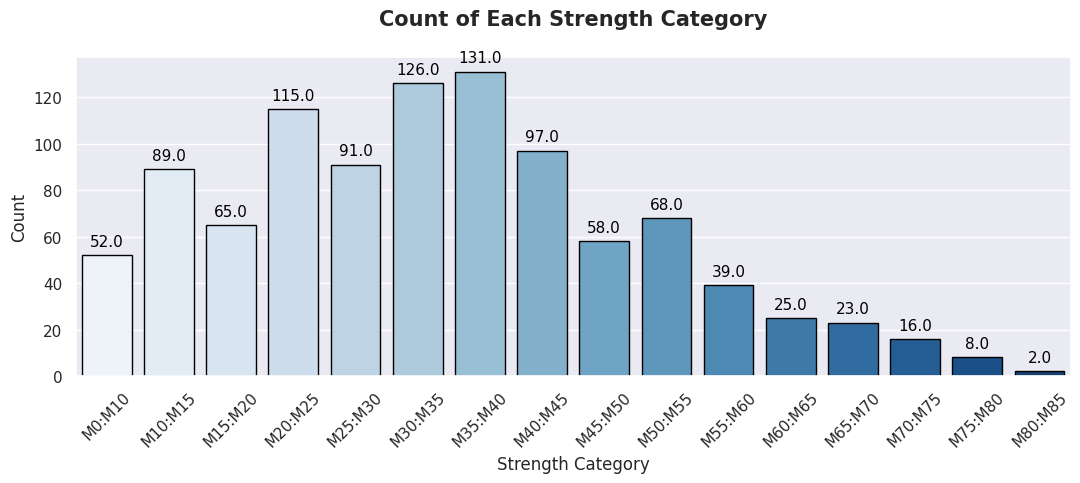

In [26]:
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='StrengthCategory', data=df, palette='Blues', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Count of Each Strength Category\n', fontsize=15, fontweight='bold')
plt.xlabel('Strength Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Majority Strength Concentration (M30)**:
The highest concentration of concrete compressive strength values is in the M30 (12.5%) and M35 (13.0%) categories. These fall within the **Standard Strength Grades**, which are commonly used for general construction, including residential and mid-rise buildings.

> **Categories M20 (11.4%) and M25 (9.1%)** also have a significant presence. These fall within the **higher end of Ordinary Grades and the lower end of Standard Grades**, suitable for basic infrastructure like roads, beams, and slabs in low-load applications.

> **Low Strength (M0)**:
* The M0 (5.2%), M10 (8.9%), and M15 (6.5%) categories represent the lower strength levels. These may be used for non-structural or temporary purposes, such as pavements, sidewalks, or foundation bases in low-load conditions.
* Collectively, low-strength grades account for about 20.5% of the dataset.

> **High Strength Concentration** (M40):M40 (9.7%) and M45 (5.8%) represent a notable proportion of **higher-strength concrete**, likely used in more demanding projects such as tall buildings, bridges, and heavy-duty industrial floors.

> **Ultra High Strength (M55):**
Concrete grades above M55 (M55) have much smaller proportions. These grades are typically used in highly specialized infrastructure such as tall skyscrapers, high-load bridges, and special industrial structures.

> **Rare Occurrences of Very High Strength (M70 and Above):**
M70 (1.6%) and M75 (0.8%) have very low counts, showing that ultra-high-strength concrete is only used in very specific scenarios.

> **Negligible Use of Extreme Strength Grades:**
M80(0.2%) is the least represented category, which is expected since these grades are often only used in highly specialized, large-scale projects, such as nuclear reactors or specialized marine structures.


In [27]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,StrengthCategory,StrengthClassification
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79,M75:M80,High
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61,M60:M65,High
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40,M35:M40,Standard
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41,M40:M45,Standard
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44,M40:M45,Standard


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CementComponent            1005 non-null   float64 
 1   BlastFurnaceSlag           1005 non-null   float64 
 2   FlyAshComponent            1005 non-null   float64 
 3   WaterComponent             1005 non-null   float64 
 4   SuperplasticizerComponent  1005 non-null   float64 
 5   CoarseAggregateComponent   1005 non-null   float64 
 6   FineAggregateComponent     1005 non-null   float64 
 7   AgeInDays                  1005 non-null   int64   
 8   Strength                   1005 non-null   int64   
 9   StrengthCategory           1005 non-null   category
 10  StrengthClassification     1005 non-null   object  
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 88.0+ KB


# Bivariate Analysis with target "Strength"

In [29]:
# Separate Categorical and Numerical columns in dataset
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

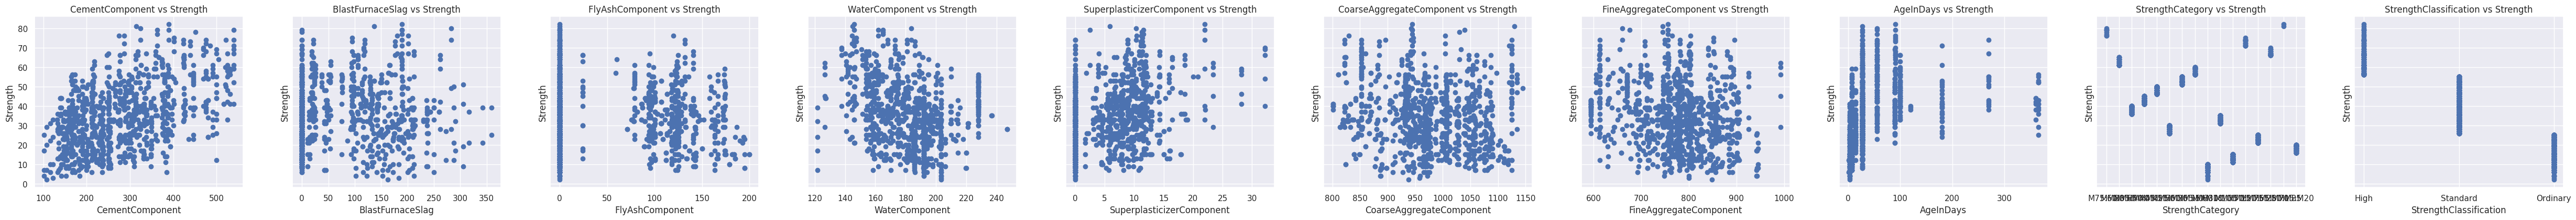

In [30]:
features = [col for col in df.columns if col != 'Strength']

num_features = len(features)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5), sharey=True)

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['Strength'])
    axes[i].set_title(f'{feature} vs Strength')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Strength')

plt.tight_layout(pad=3.0)
plt.show()

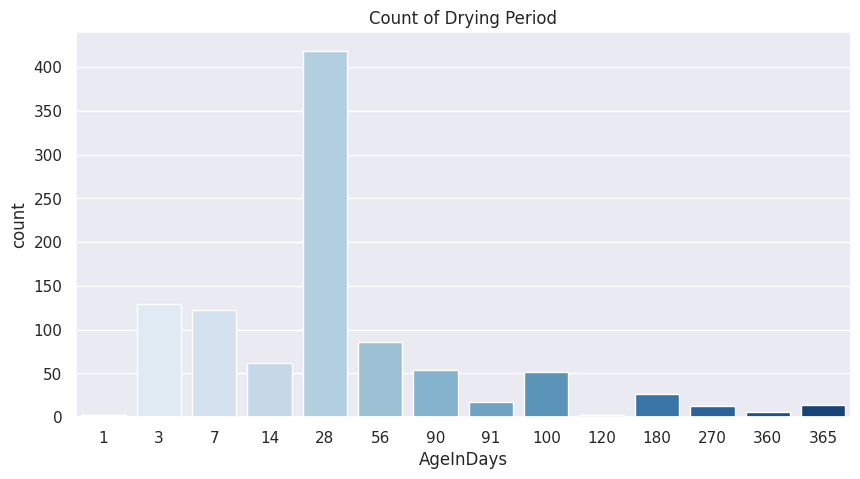

In [31]:
# Age Related Analysis: Unvariate Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='AgeInDays', data=df, palette='Blues')
plt.title('Count of Drying Period')
plt.xlabel('AgeInDays')
plt.show()

As we note: the concrete drying period is concentrated in a specific period
> 3 days, 7 days, 2 weeks, 4 weeks, 8 weeks,
 3 months, 6 months, 9 months or 1 year

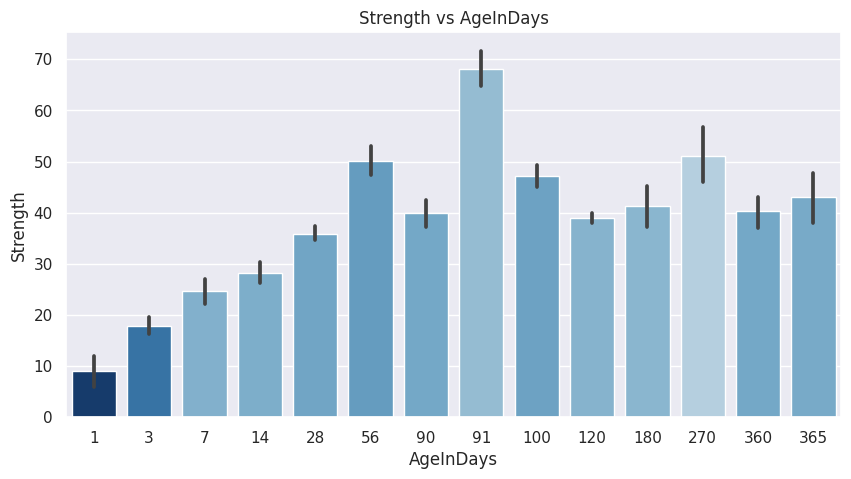

In [32]:
# Bivariate Analysis between Dry Period and Strength
norm = plt.Normalize(df['Strength'].min(), df['Strength'].max())
colors = plt.cm.Blues(norm(df['Strength']))

plt.figure(figsize=(10, 5))
sns.barplot(x='AgeInDays', y='Strength', data=df, palette=colors)

sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
plt.colorbar(sm,ax=ax,label='Strength')

plt.title('Strength vs AgeInDays')
plt.xlabel('AgeInDays')
plt.ylabel('Strength')
plt.show()

Strength generally increases with age: As the age in days increases, the strength tends to increase as well.

**What makes the Strength very high when drying period consume 91 Days?**

In [33]:
df[df['AgeInDays'] == 91]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,StrengthCategory,StrengthClassification
162,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64,M60:M65,High
163,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,91,66,M65:M70,High
164,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65,M60:M65,High
165,425.0,106.3,0.0,151.4,18.6,936.0,803.7,91,66,M65:M70,High
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62,M60:M65,High
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74,M70:M75,High
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70,M65:M70,High
170,388.6,97.1,0.0,157.9,12.1,852.1,925.7,91,57,M55:M60,High
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59,M55:M60,High
173,318.8,212.5,0.0,155.7,14.3,852.1,880.4,91,68,M65:M70,High


> 1. The WaterComponent in the mix is moderate (between 126.6 to 181.1), and the CementComponent is relatively high. This suggests a favorable water-to-cement ratio, which is key to maximizing strength. If too much water were used, it would weaken the concrete, but if too little were used, it would prevent proper hydration. The balance observed here seems ideal for promoting strength gain.
2. The use of materials like BlastFurnaceSlag and FlyAshComponent can slow down the initial strength gain but contribute to higher long-term strength. These materials improve the microstructure of the concrete, contributing to durability and higher strengths at later stages of curing (such as at 91 days).
3. Rows with high CementComponent values (e.g., 531.3 kg) show high compressive strengths. Cement is the primary binder in the mix, and higher quantities lead to more binding strength as long as the water-cement ratio is appropriate.

# Correalation with target: Heatmap

Index([], dtype='object')


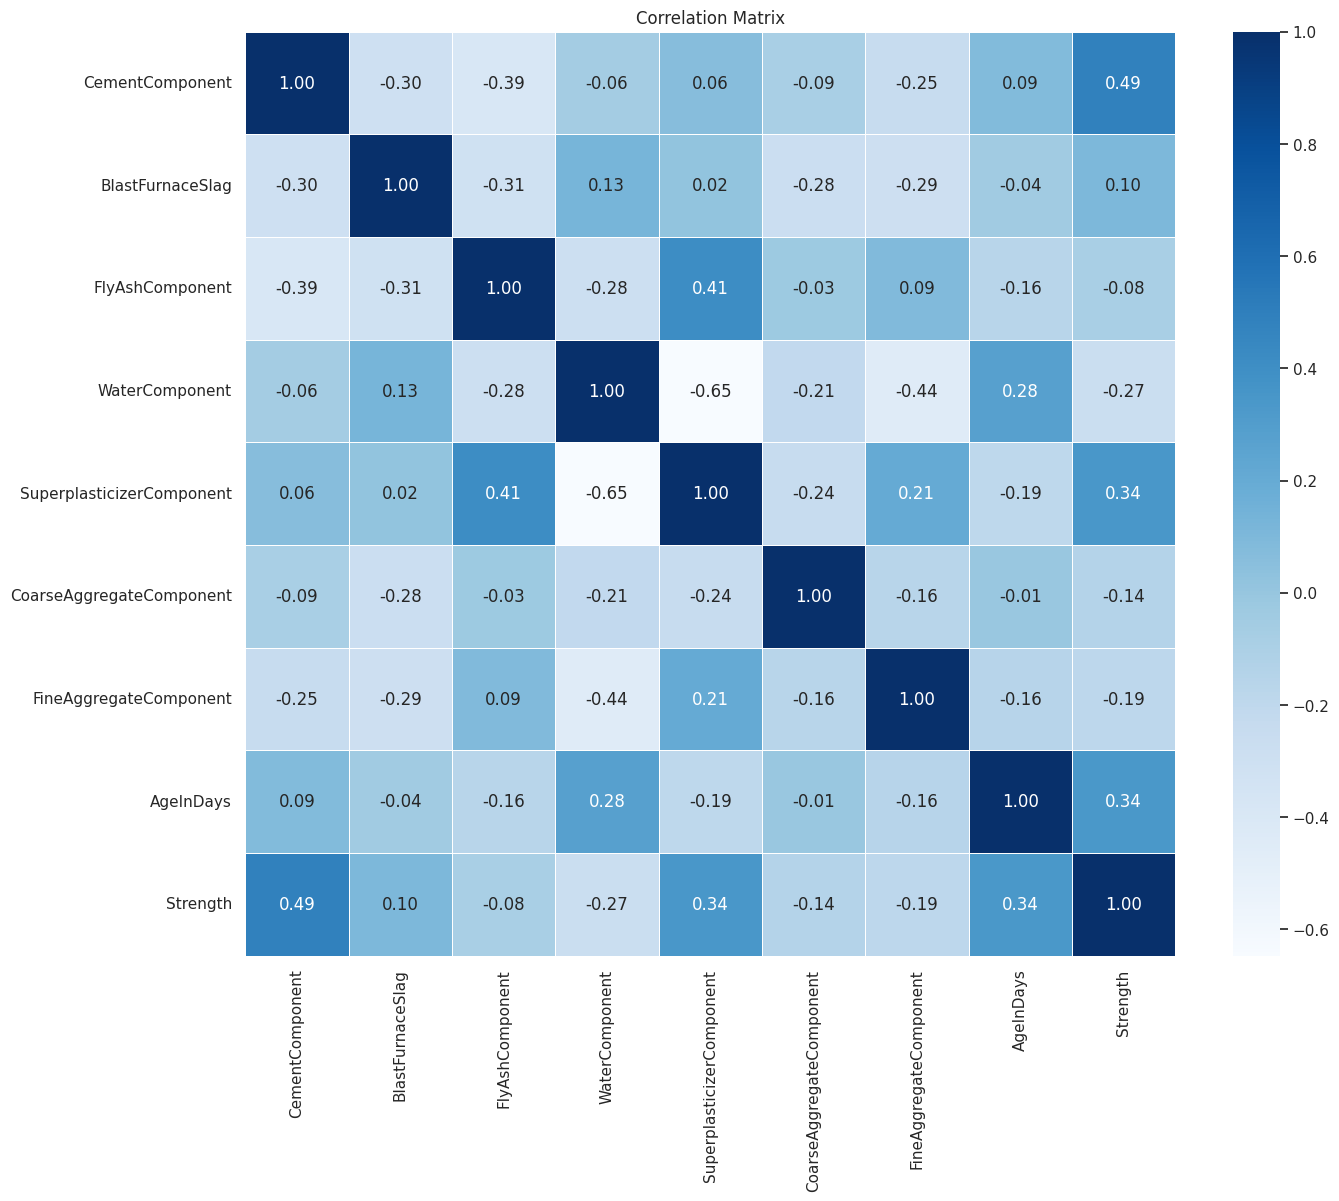

In [34]:
# Corrrelation by Heatmap
interval_cols = df.select_dtypes(include='interval').columns
print(interval_cols)
num_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5,
)
plt.title('Correlation Matrix')
plt.show()

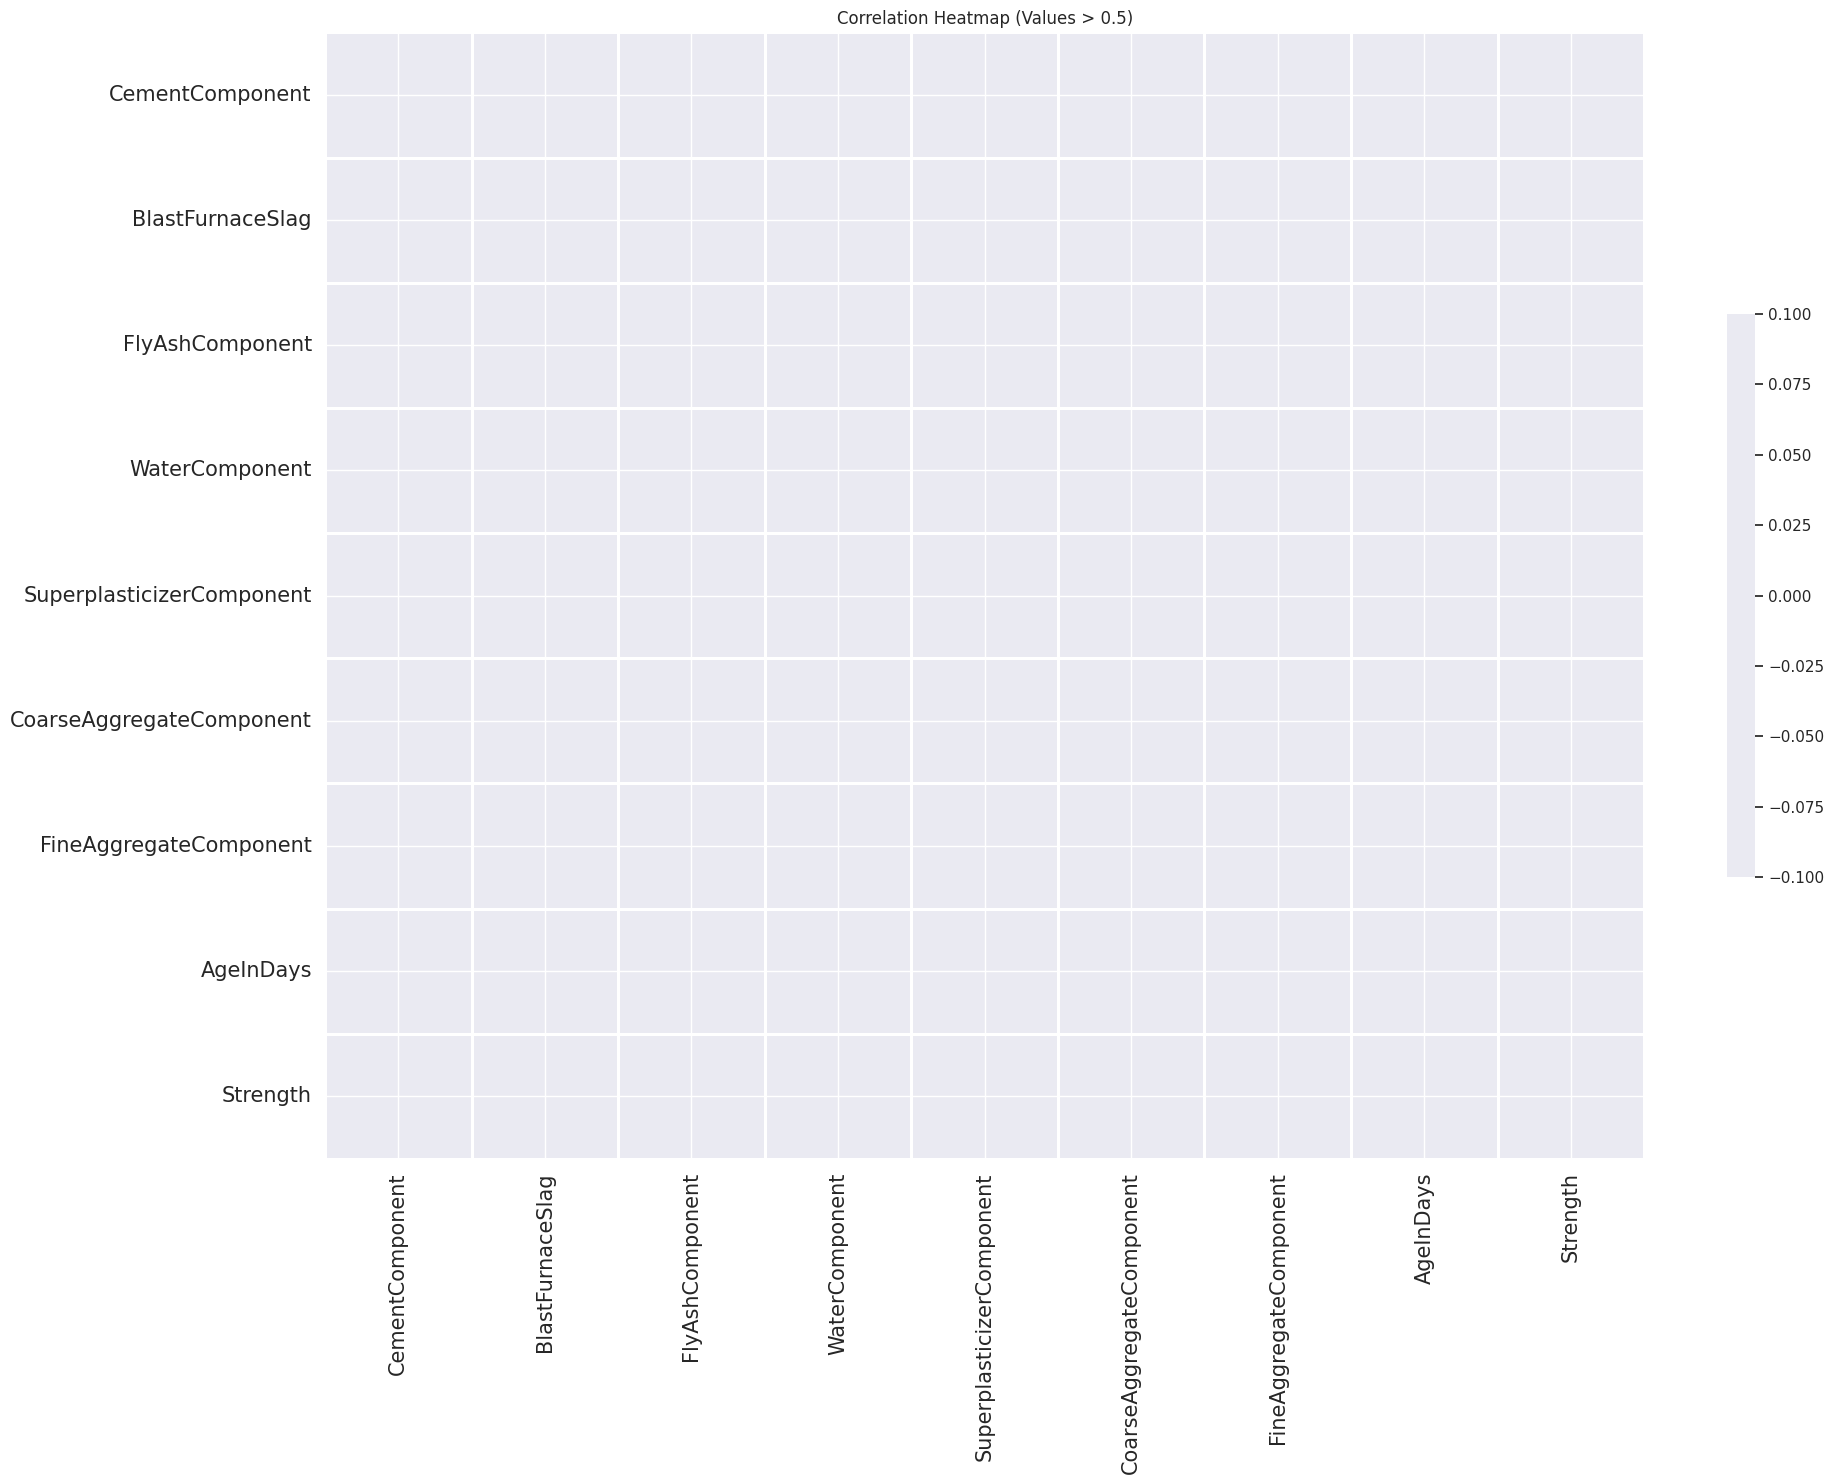

In [35]:
df_filtered = df.select_dtypes(include="number")

corr_matrix = df_filtered.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix[corr_matrix > 0.75]

plt.figure(figsize=(20, 15))
ax = sns.heatmap(filtered_corr, annot=True, cmap='rocket_r', fmt='.2f',
                 linewidths=1, linecolor='white', mask=mask, center=0, cbar_kws={"shrink": .5})

for label in ax.get_yticklabels():
    label.set_size(15)

for label in ax.get_xticklabels():
    label.set_size(15)


plt.title("Correlation Heatmap (Values > 0.5)")

plt.tight_layout()
plt.show()

<Axes: xlabel='WaterComponent', ylabel='SuperplasticizerComponent'>

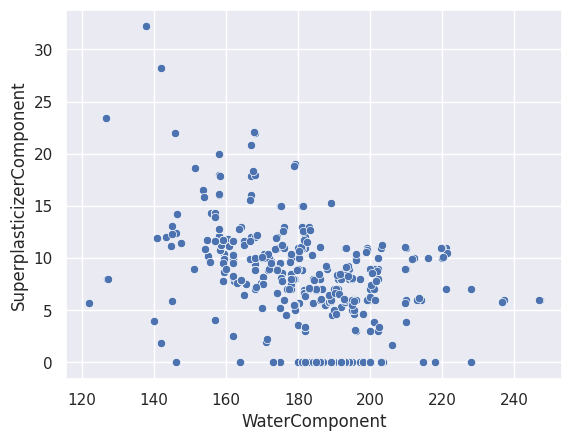

In [36]:
sns.scatterplot(x='WaterComponent',y='SuperplasticizerComponent',data=df)

# Detect multicollinearity by VIF

In [37]:
X = df.drop(columns=['Strength','StrengthCategory','StrengthClassification'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data

,Feature,VIF
0,CementComponent,7.448990
1,BlastFurnaceSlag,7.263275
2,FlyAshComponent,6.084539
3,WaterComponent,6.838492
4,SuperplasticizerComponent,2.867335
5,CoarseAggregateComponent,4.956211
6,FineAggregateComponent,6.972305
7,AgeInDays,1.120113


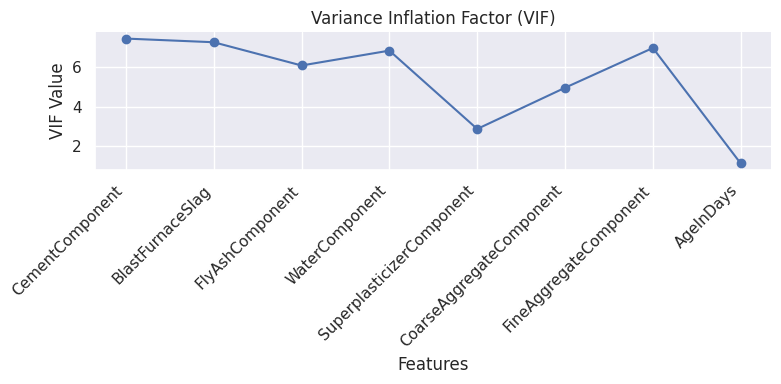

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(vif_data['Feature'], vif_data['VIF'], marker='o', linestyle='-', color='b')
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('Features')
plt.ylabel('VIF Value')

plt.xticks(rotation=45, ha='right')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

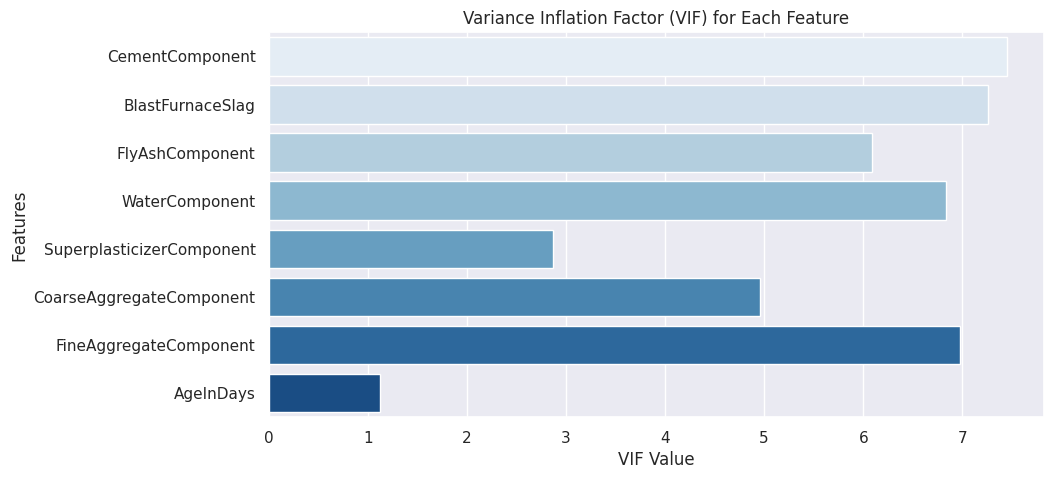

In [39]:
# Visualize the VIF values using a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='Blues')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.show()

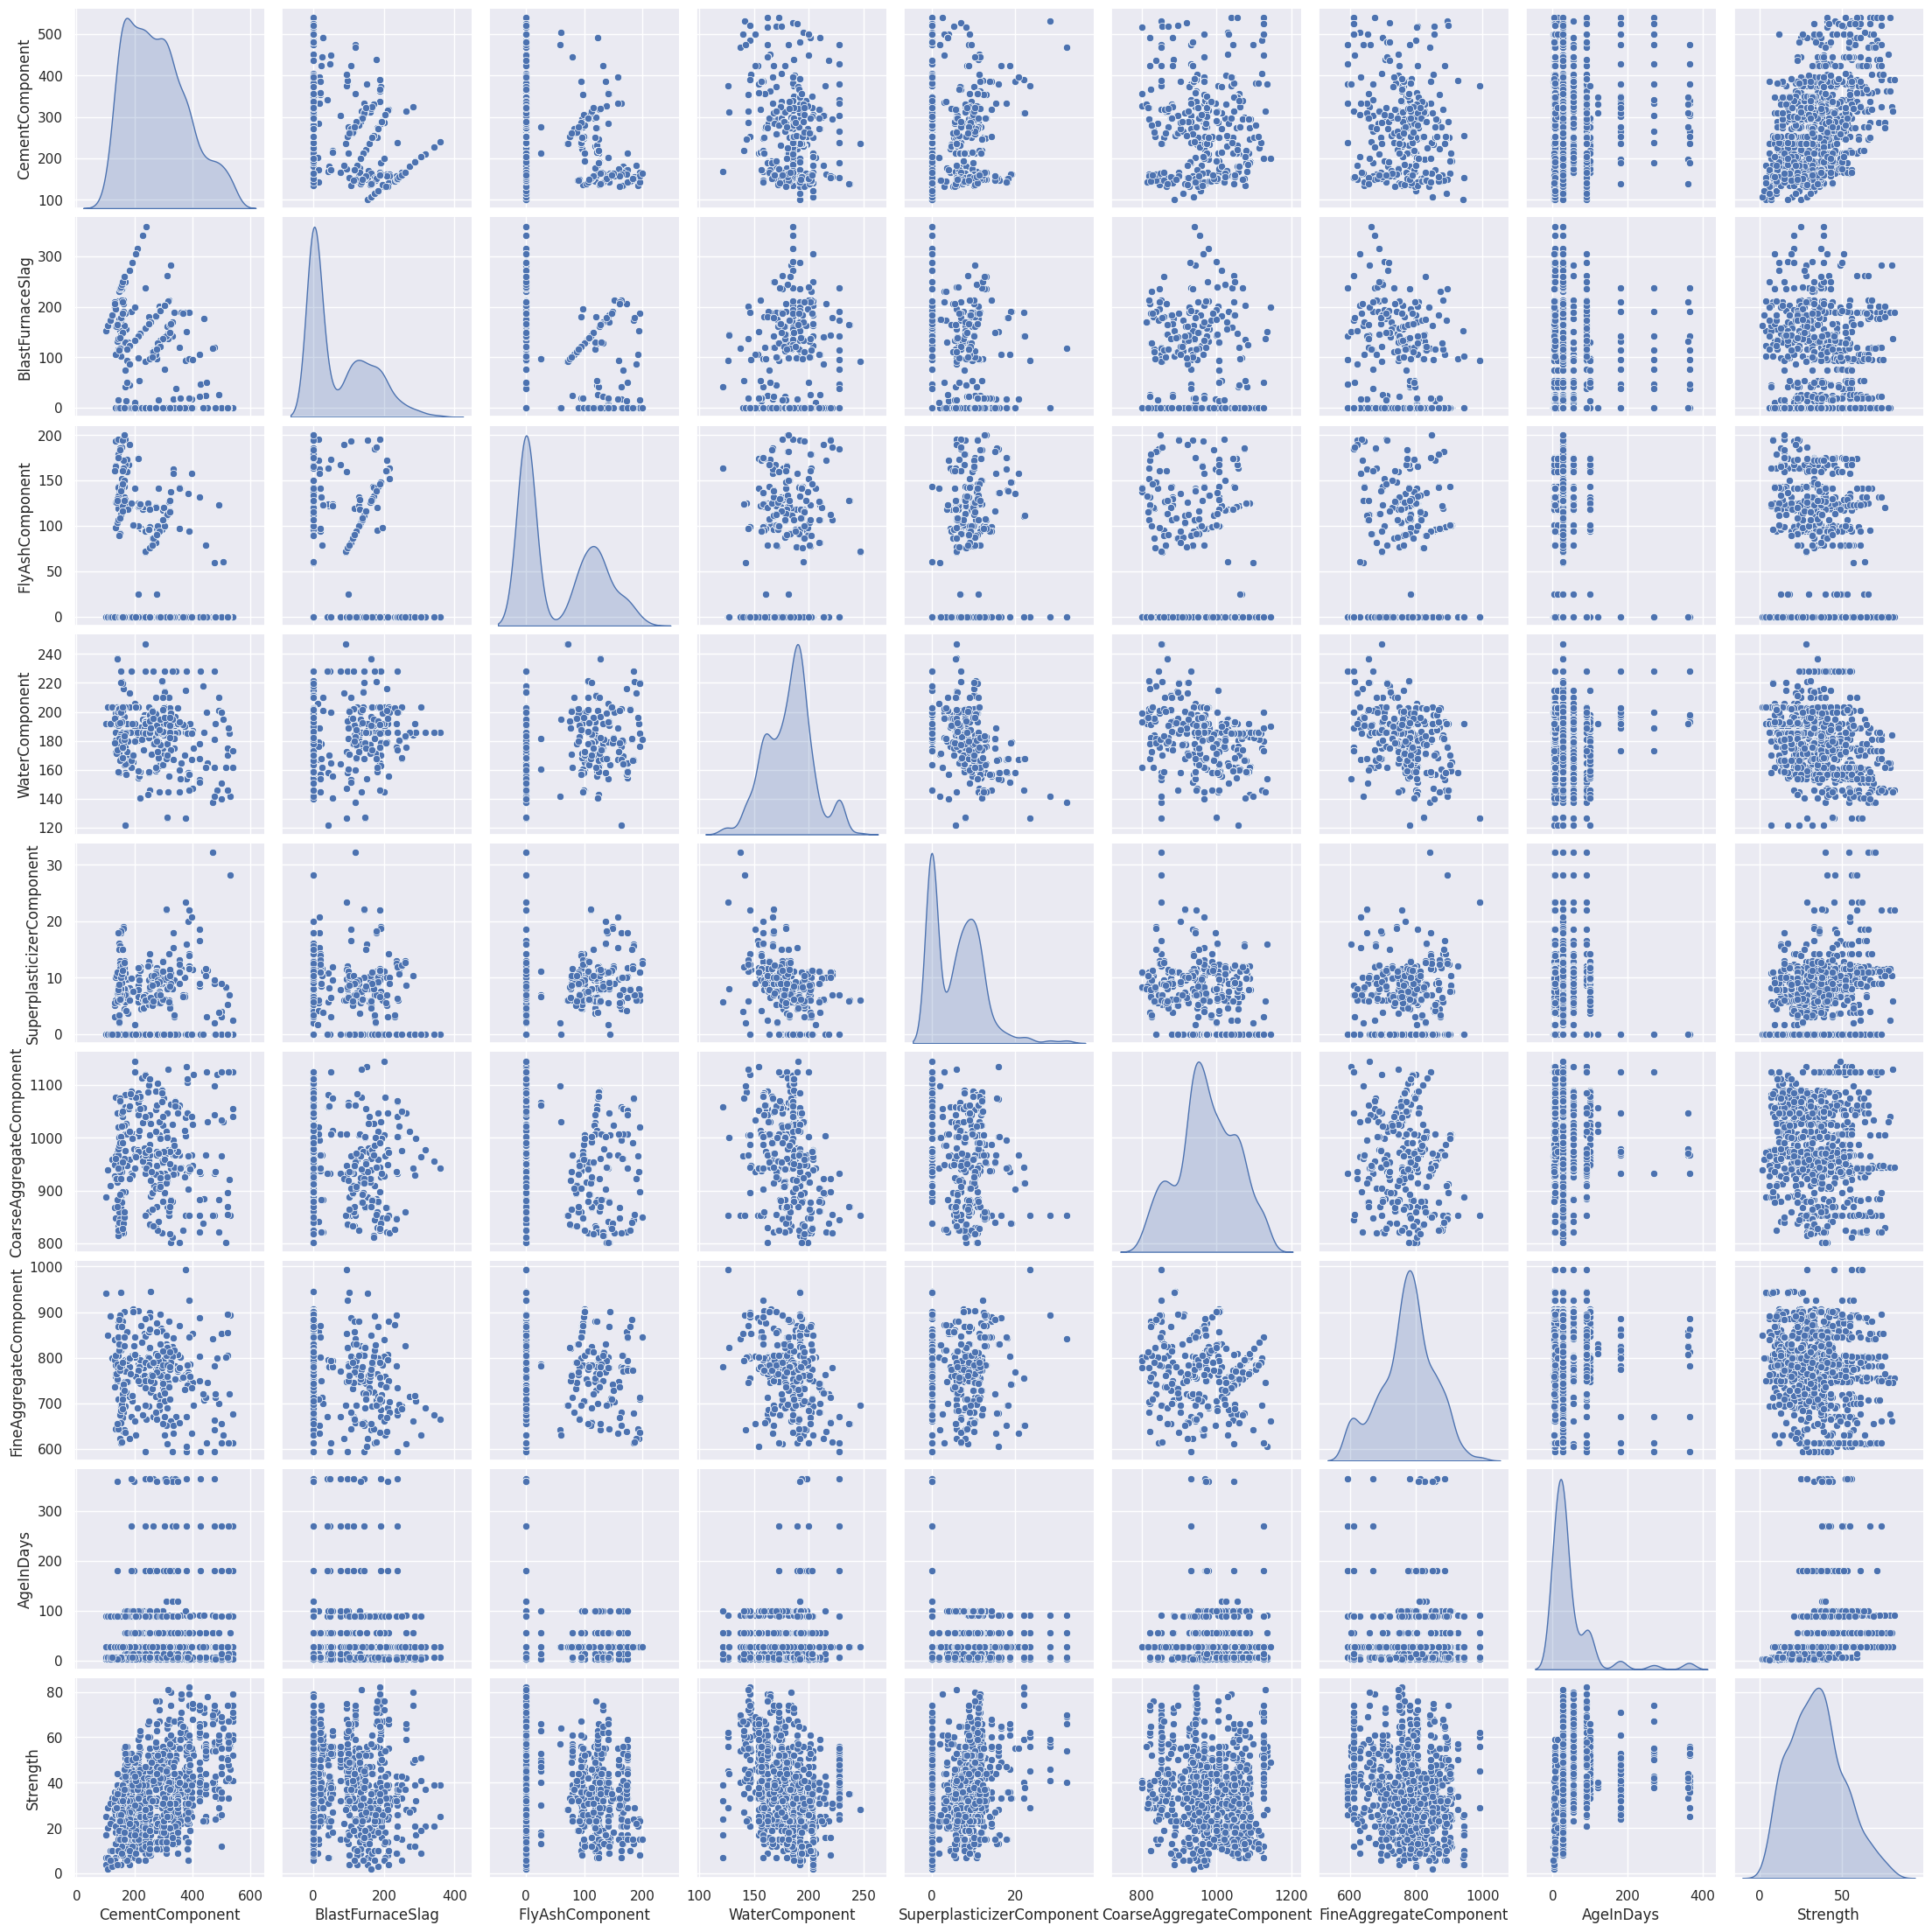

In [40]:
sns.pairplot(df, diag_kind="kde")

# Multivariate analysis between features

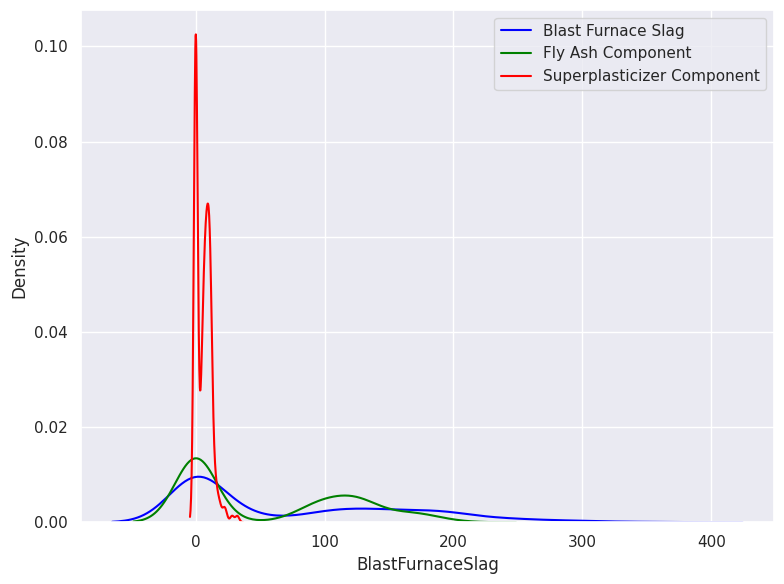

In [41]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=df, x='BlastFurnaceSlag', label='Blast Furnace Slag', fill=False, color='blue')
sns.kdeplot(data=df, x='FlyAshComponent', label='Fly Ash Component', fill=False, color='green')
sns.kdeplot(data=df, x='SuperplasticizerComponent', label='Superplasticizer Component', fill=False, color='red')
plt.legend()
plt.tight_layout()
plt.show()

> Furnace slag, Fly Ash and Superplasticizer seem to all increase around the 0, meaning most of these feature are non existent most of the time

# **Data Preprocessing**

1. Handle Outliers

In [42]:
# general method to calc the percentage of outliers
def calculate_outliers(df):
    outlier_flags = pd.DataFrame(False, index=df.index, columns=df.columns)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_flags[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
        num_outliers = outlier_flags[column].sum()
        percentage_outliers = (num_outliers / df.shape[0]) * 100
        print(f"Feature '{column}': {num_outliers} outliers ({percentage_outliers:.2f}%)")
    rows_with_outliers = outlier_flags.any(axis=1).sum()
    percentage_rows_with_outliers = (rows_with_outliers / df.shape[0]) * 100
    print(f"\nTotal rows with outliers: {rows_with_outliers} ({percentage_rows_with_outliers:.2f}%)")
    return outlier_flags
print("Feature & Count, Percentage of outliers in each Numerical Feature:")
outlier_flags = calculate_outliers(df)

Feature & Count, Percentage of outliers in each Numerical Feature:
Feature 'CementComponent': 0 outliers (0.00%)
Feature 'BlastFurnaceSlag': 2 outliers (0.20%)
Feature 'FlyAshComponent': 0 outliers (0.00%)
Feature 'WaterComponent': 15 outliers (1.49%)
Feature 'SuperplasticizerComponent': 10 outliers (1.00%)
Feature 'CoarseAggregateComponent': 0 outliers (0.00%)
Feature 'FineAggregateComponent': 5 outliers (0.50%)
Feature 'AgeInDays': 59 outliers (5.87%)
Feature 'Strength': 10 outliers (1.00%)

Total rows with outliers: 96 (9.55%)


2. Data Transformation

Handling outliers with log transformation

In [43]:
outlier_cols = [ 'BlastFurnaceSlag', 'WaterComponent', 'SuperplasticizerComponent', 'FineAggregateComponent']

In [44]:
for col in outlier_cols:
    df[col] = np.log10(df[col] + 1)

In [45]:
# Label Encoding for Categorical Features
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [46]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,StrengthCategory,StrengthClassification
0,540.0,0.000000,0.0,2.212188,0.544068,1040.0,2.830589,28,79,14,0
1,540.0,0.000000,0.0,2.212188,0.544068,1055.0,2.830589,28,61,11,0
2,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,270,40,6,2
3,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,365,41,7,2
4,198.6,2.125156,0.0,2.285557,0.000000,978.4,2.917243,360,44,7,2


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CementComponent,1005.0,278.631343,104.344261,102.000000,190.700000,265.000000,349.000000,540.000000
BlastFurnaceSlag,1005.0,1.084681,1.046469,0.000000,0.000000,1.322219,2.156852,2.556785
FlyAshComponent,1005.0,55.536318,64.207969,0.000000,0.000000,0.000000,118.300000,200.100000
WaterComponent,1005.0,2.259625,0.051459,2.089198,2.224274,2.271144,2.287578,2.394452
SuperplasticizerComponent,1005.0,0.619881,0.500583,0.000000,0.000000,0.851258,1.041393,1.521138
CoarseAggregateComponent,1005.0,974.376816,77.579667,801.000000,932.000000,968.000000,1031.000000,1145.000000
FineAggregateComponent,1005.0,2.886147,0.046299,2.774517,2.860518,2.892651,2.915505,2.997212
AgeInDays,1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.000000,365.000000
Strength,1005.0,34.748259,16.277759,2.000000,23.000000,33.000000,44.000000,82.000000
StrengthCategory,1005.0,5.363184,3.269203,0.000000,3.000000,5.000000,7.000000,15.000000


In [48]:
df['Strength'].value_counts()

Strength
33    42
39    36
37    28
24    28
31    27
      ..
77     1
81     1
78     1
2      1
3      1
Name: count, Length: 80, dtype: int64



> So target is continuos numeric feature,, we should use Linear Regression



# Feature Engineering

In [49]:
df1 = df.copy()

In [50]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,StrengthCategory,StrengthClassification
0,540.0,0.000000,0.0,2.212188,0.544068,1040.0,2.830589,28,79,14,0
1,540.0,0.000000,0.0,2.212188,0.544068,1055.0,2.830589,28,61,11,0
2,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,270,40,6,2
3,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,365,41,7,2
4,198.6,2.125156,0.0,2.285557,0.000000,978.4,2.917243,360,44,7,2


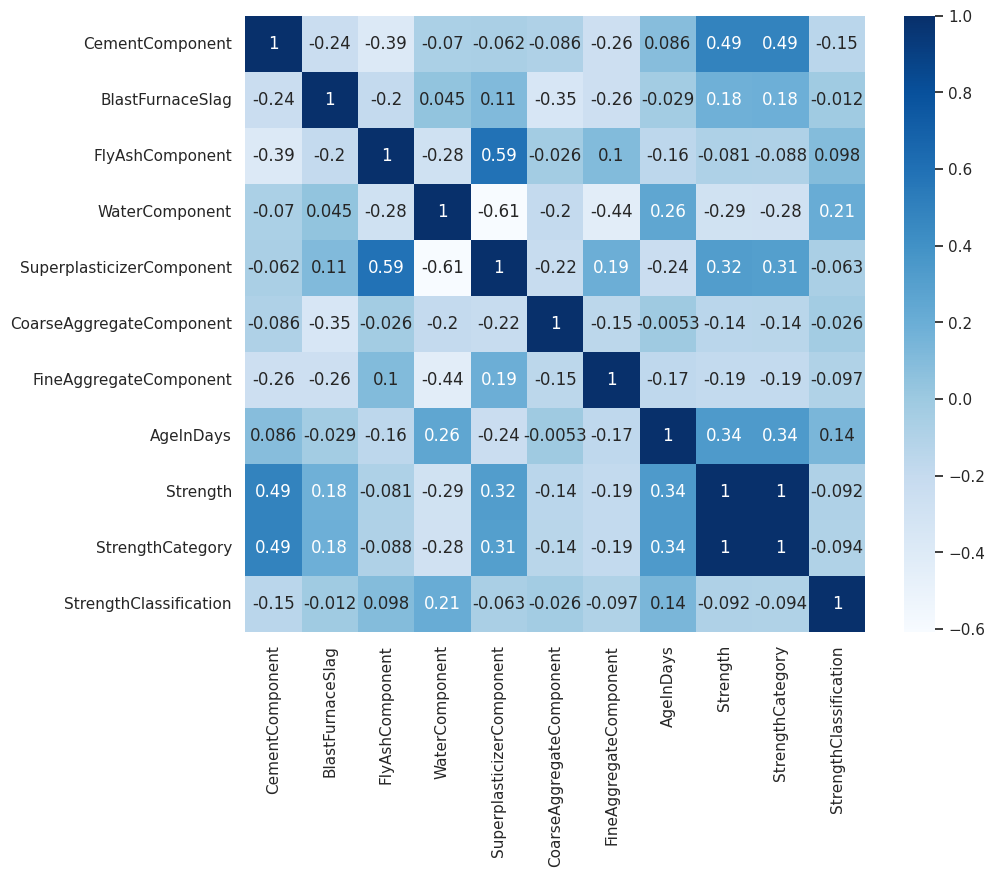

In [51]:
numerical_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='Blues')
plt.show()

In [52]:
df1["TotalAggregatePerDays"] =(df1["CoarseAggregateComponent"] +df1["FineAggregateComponent"])/df1["AgeInDays"]

In [53]:
df1["AggregateToBinderRatio"]= df1["TotalAggregatePerDays"]/ (df1['CementComponent'] + df1['BlastFurnaceSlag'] + df1['FlyAshComponent'])

In [54]:
df1['CementToAggregateRatio'] = df1['CementComponent'] / (df1['CoarseAggregateComponent'] + df1['FineAggregateComponent'])

In [55]:
df1['LogAggregateToBinderRatio'] = np.log(df1['AggregateToBinderRatio'])
## -66 correlation

In [56]:
df1['SuperplasticizerAgeInteraction'] = df1['SuperplasticizerComponent'] * df1['AgeInDays']

In [57]:
df1["BlastFurnaceCementAgeInteraction"] = df1["BlastFurnaceSlag"] * df1["CementComponent"] * df1["AgeInDays"]


In [58]:
#df1["CementWaterAgeLogInteraction"] = np.log1p(df1["CementComponent"] * df1["WaterComponent"] * df1["AgeInDays"])
df1["LogCementSquaredWaterAge"] = np.log1p((df1["CementComponent"] ** 2) * df1["WaterComponent"] * df1["AgeInDays"])


In [59]:
#-0.72 correlation but lots of multicolinearity
#df1["s"]= df1['LogAggregateToBinderRatio']*(df1['CementToAggregateRatio'])

In [60]:
df1 = df1.drop(columns=["TotalAggregatePerDays","AggregateToBinderRatio","CementComponent","AgeInDays",'SuperplasticizerComponent',"LogAggregateToBinderRatio",'CementToAggregateRatio'])

In [61]:
#df1 = df1.drop(columns=["TotalAggregatePerDays","AggregateToBinderRatio","CementComponent","AgeInDays"])

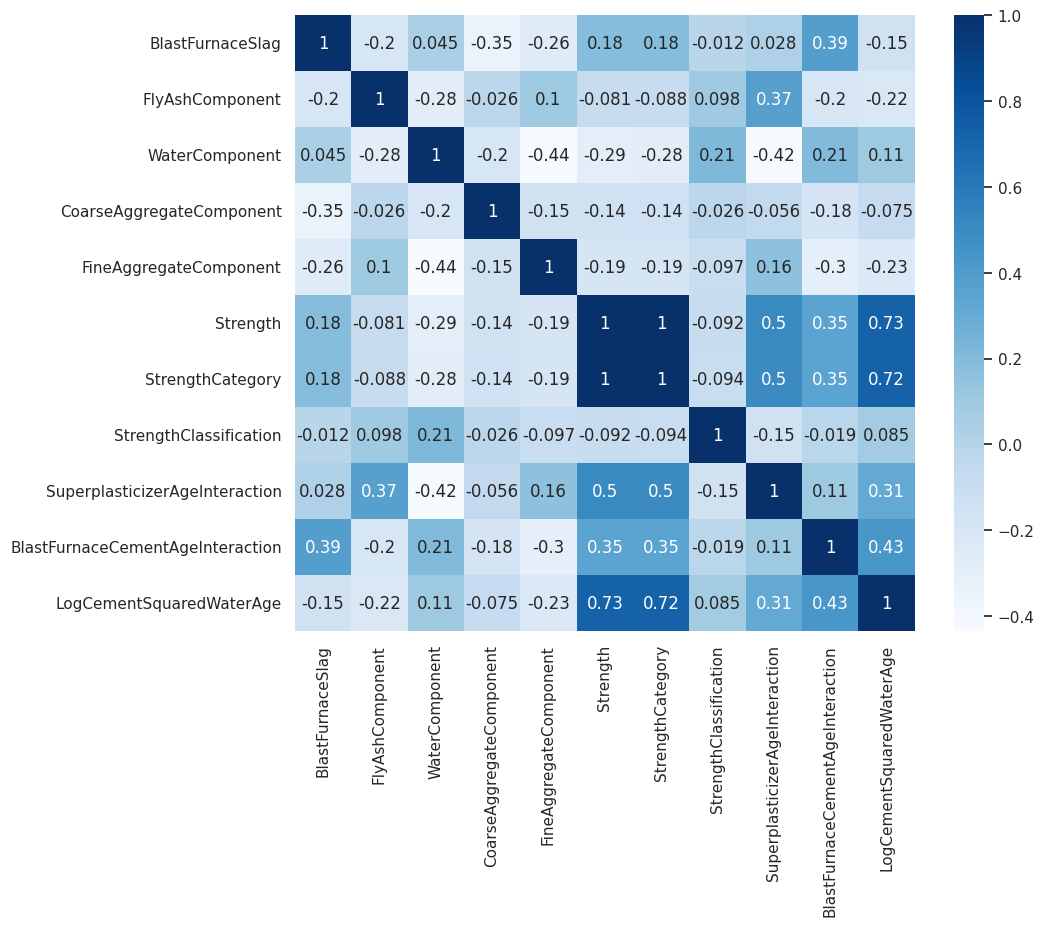

In [62]:
numerical_cols = df1.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='Blues')
plt.show()

In [63]:
df1.head()

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,Strength,StrengthCategory,StrengthClassification,SuperplasticizerAgeInteraction,BlastFurnaceCementAgeInteraction,LogCementSquaredWaterAge
0,0.000000,0.0,2.212188,1040.0,2.830589,79,14,0,15.233905,0.000000,16.709325
1,0.000000,0.0,2.212188,1055.0,2.830589,61,11,0,15.233905,0.000000,16.709325
2,2.156852,0.0,2.359835,932.0,2.774517,40,6,2,0.000000,193631.379419,18.070294
3,2.156852,0.0,2.359835,932.0,2.774517,41,7,2,0.000000,261760.938844,18.371769
4,2.125156,0.0,2.285557,978.4,2.917243,44,7,2,0.000000,151940.141192,17.295299


### 2nd Feature Engineering

In [64]:
df2 = df.copy()

In [65]:
df2["TotalAggregatePerDays"] =(df2["CoarseAggregateComponent"] +df2["FineAggregateComponent"])/df2["AgeInDays"]

In [66]:
df2["AggregateToBinderRatio"]= df2["TotalAggregatePerDays"]/ (df2['CementComponent'] + df2['BlastFurnaceSlag'] + df2['FlyAshComponent'])

In [67]:
df2['CementToAggregateRatio'] = df2['CementComponent'] / (df2['CoarseAggregateComponent'] + df2['FineAggregateComponent'])

In [68]:
df2['LogAggregateToBinderRatio'] = np.log(df2['AggregateToBinderRatio'])
df2['SuperplasticizerAgeInteraction'] = df2['SuperplasticizerComponent'] * df2['AgeInDays']

In [69]:
df2["BlastFurnaceCementAgeInteraction"] = df2["BlastFurnaceSlag"] * df2["CementComponent"] * df2["AgeInDays"]
df2 = df2.drop(columns=["TotalAggregatePerDays","AggregateToBinderRatio","CementComponent","AgeInDays",'SuperplasticizerComponent'])

# **Modeling**

# 1. Linear Regression Model

In [70]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,StrengthCategory,StrengthClassification
0,540.0,0.000000,0.0,2.212188,0.544068,1040.0,2.830589,28,79,14,0
1,540.0,0.000000,0.0,2.212188,0.544068,1055.0,2.830589,28,61,11,0
2,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,270,40,6,2
3,332.5,2.156852,0.0,2.359835,0.000000,932.0,2.774517,365,41,7,2
4,198.6,2.125156,0.0,2.285557,0.000000,978.4,2.917243,360,44,7,2


In [71]:
X = df1.drop(columns=["StrengthCategory", "Strength", "StrengthClassification"])
y = df1["Strength"]

In [72]:
x = df2.drop(columns=["StrengthCategory", "Strength", "StrengthClassification"])
Y = df2["Strength"]

In [73]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, shuffle = True,random_state=42)
results = []

for scaler_name, scaler in scalers.items():

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'Linear Regression', train_accuracy, test_accuracy])


results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df

,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,Linear Regression,0.805108,0.802333
1,StandardScaler,Linear Regression,0.805108,0.802333
2,RobustScaler,Linear Regression,0.805108,0.802333


In [75]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    train_accuracy = model.score(X_train_poly, y_train)
    test_accuracy = model.score(X_test_poly, y_test)
    results.append([scaler_name, 'Polynomial Regression', train_accuracy, test_accuracy])
new_results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df = pd.concat([results_df, new_results_df], ignore_index=True)
results_df

,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,Linear Regression,0.805108,0.802333
1,StandardScaler,Linear Regression,0.805108,0.802333
2,RobustScaler,Linear Regression,0.805108,0.802333
3,MinMaxScaler,Polynomial Regression,0.883479,0.881474
4,StandardScaler,Polynomial Regression,0.893449,0.881606
5,RobustScaler,Polynomial Regression,0.893449,0.881606


In [76]:
# Using Ridge Regression Model
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    train_accuracy = model.score(X_train_poly, y_train)
    test_accuracy = model.score(X_test_poly, y_test)
    ridge_model = Ridge()
    ridge_model.fit(X_train_poly, y_train)
    ridge_train_accuracy = ridge_model.score(X_train_poly, y_train)
    ridge_test_accuracy = ridge_model.score(X_test_poly, y_test)
    results.append([scaler_name, 'Polynomial + Ridge Regression', ridge_train_accuracy, ridge_test_accuracy])
new_results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df = pd.concat([results_df, new_results_df], ignore_index=True)
results_df

,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,Linear Regression,0.805108,0.802333
1,StandardScaler,Linear Regression,0.805108,0.802333
2,RobustScaler,Linear Regression,0.805108,0.802333
3,MinMaxScaler,Polynomial Regression,0.883479,0.881474
4,StandardScaler,Polynomial Regression,0.893449,0.881606
5,RobustScaler,Polynomial Regression,0.893449,0.881606
6,MinMaxScaler,Polynomial + Ridge Regression,0.857665,0.846002
7,StandardScaler,Polynomial + Ridge Regression,0.892654,0.880098
8,RobustScaler,Polynomial + Ridge Regression,0.886666,0.870313


In [77]:
# Using Lasso Regression
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    lasso_model = Lasso()
    lasso_model.fit(X_train_poly, y_train)
    lasso_train_accuracy = lasso_model.score(X_train_poly, y_train)
    lasso_test_accuracy = lasso_model.score(X_test_poly, y_test)

    results.append([scaler_name, 'Polynomial + Lasso Regression', lasso_train_accuracy, lasso_test_accuracy])

new_results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df = pd.concat([results_df, new_results_df], ignore_index=True)
results_df


,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,Linear Regression,0.805108,0.802333
1,StandardScaler,Linear Regression,0.805108,0.802333
2,RobustScaler,Linear Regression,0.805108,0.802333
3,MinMaxScaler,Polynomial Regression,0.883479,0.881474
4,StandardScaler,Polynomial Regression,0.893449,0.881606
5,RobustScaler,Polynomial Regression,0.893449,0.881606
6,MinMaxScaler,Polynomial + Ridge Regression,0.857665,0.846002
7,StandardScaler,Polynomial + Ridge Regression,0.892654,0.880098
8,RobustScaler,Polynomial + Ridge Regression,0.886666,0.870313
9,MinMaxScaler,Polynomial + Lasso Regression,0.520403,0.482578


In [78]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = XGBRegressor(n_estimators=300, learning_rate=0.4, max_depth=1, subsample=.6, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'XGBRegressor', train_accuracy, test_accuracy])

new_results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df = pd.concat([results_df, new_results_df], ignore_index=True)
results_df.tail()


,Scaler,Model,Train Accuracy,Test Accuracy
10,StandardScaler,Polynomial + Lasso Regression,0.783267,0.756374
11,RobustScaler,Polynomial + Lasso Regression,0.752507,0.730900
12,MinMaxScaler,XGBRegressor,0.934250,0.902978
13,StandardScaler,XGBRegressor,0.934250,0.902978
14,RobustScaler,XGBRegressor,0.934250,0.902978


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True,random_state=42)

results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    xgb_model = XGBRegressor(
    n_estimators=150,
    max_depth=3,
    subsample = .8,
    learning_rate=0.1
    )
    xgb_model.fit(X_train_poly, y_train)
    xgb_train_accuracy = xgb_model.score(X_train_poly, y_train)
    xgb_test_accuracy = xgb_model.score(X_test_poly, y_test)
    results.append([scaler_name, 'Polynomial + XGBRegressor', xgb_train_accuracy, xgb_test_accuracy])
new_results_df = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
results_df = pd.concat([results_df, new_results_df], ignore_index=True)
results_df


,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,Linear Regression,0.805108,0.802333
1,StandardScaler,Linear Regression,0.805108,0.802333
2,RobustScaler,Linear Regression,0.805108,0.802333
3,MinMaxScaler,Polynomial Regression,0.883479,0.881474
4,StandardScaler,Polynomial Regression,0.893449,0.881606
5,RobustScaler,Polynomial Regression,0.893449,0.881606
6,MinMaxScaler,Polynomial + Ridge Regression,0.857665,0.846002
7,StandardScaler,Polynomial + Ridge Regression,0.892654,0.880098
8,RobustScaler,Polynomial + Ridge Regression,0.886666,0.870313
9,MinMaxScaler,Polynomial + Lasso Regression,0.520403,0.482578


# Using Best Model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True,random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
xgb_model = XGBRegressor(
n_estimators=150,
max_depth=3,
subsample = .8,
learning_rate=0.1
)
xgb_model.fit(X_train_poly, y_train)
xgb_train_accuracy = xgb_model.score(X_train_poly, y_train)
xgb_test_accuracy = xgb_model.score(X_test_poly, y_test)

In [81]:
# Calc Mean Squared Error
y_train_pred = xgb_model.predict(X_train_poly)
y_test_pred = xgb_model.predict(X_test_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 7.713227925047107
Test MSE: 17.97470966108783


In [82]:
# Accuracy of training of best regression used
xgb_train_accuracy

0.969909914894138

In [83]:
# Accuracy of test of best regression used
xgb_test_accuracy

0.9395774623087212

# 2. Classification Model

In [84]:
X = df1.drop(columns=["StrengthCategory", "Strength", "StrengthClassification"])
y = df1["StrengthClassification"]
mapping = {
    'High': 2,
    'Ordinary': 0,
    'Standard': 1
}
y = y.replace(mapping)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [86]:
resultdf1 = pd.DataFrame()

In [87]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'LogisticRegression', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

           Scaler               Model  Train Accuracy  Test Accuracy
0    MinMaxScaler  LogisticRegression        0.814677       0.810945
1  StandardScaler  LogisticRegression        0.833333       0.825871
2    RobustScaler  LogisticRegression        0.828358       0.835821


In [88]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = SVC(kernel='rbf', C=20, gamma='scale', random_state=42)
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'SVM', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

           Scaler               Model  Train Accuracy  Test Accuracy
1  StandardScaler  LogisticRegression        0.833333       0.825871
2    RobustScaler  LogisticRegression        0.828358       0.835821
3    MinMaxScaler                 SVM        0.901741       0.890547
4  StandardScaler                 SVM        0.924129       0.895522
5    RobustScaler                 SVM        0.904229       0.870647


In [89]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        metric='manhattan',
    )
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'KNN', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

           Scaler Model  Train Accuracy  Test Accuracy
4  StandardScaler   SVM        0.924129       0.895522
5    RobustScaler   SVM        0.904229       0.870647
6    MinMaxScaler   KNN        0.869403       0.835821
7  StandardScaler   KNN        0.875622       0.840796
8    RobustScaler   KNN        0.876866       0.870647


In [90]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    rmodel = RandomForestClassifier(
        n_estimators=50,
        max_depth=8,
        min_samples_split=18,
        random_state=42,
        class_weight="balanced_subsample"
    )
    rmodel.fit(X_train_scaled, y_train)
    train_accuracy = rmodel.score(X_train_scaled, y_train)
    test_accuracy = rmodel.score(X_test_scaled, y_test)
    results.append([scaler_name, 'RandomForest', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

            Scaler         Model  Train Accuracy  Test Accuracy
7   StandardScaler           KNN        0.875622       0.840796
8     RobustScaler           KNN        0.876866       0.870647
9     MinMaxScaler  RandomForest        0.925373       0.920398
10  StandardScaler  RandomForest        0.925373       0.920398
11    RobustScaler  RandomForest        0.925373       0.920398


In [91]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=10,
        random_state=34,
    )
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'DecisionTree', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

            Scaler         Model  Train Accuracy  Test Accuracy
10  StandardScaler  RandomForest        0.925373       0.920398
11    RobustScaler  RandomForest        0.925373       0.920398
12    MinMaxScaler  DecisionTree        0.890547       0.875622
13  StandardScaler  DecisionTree        0.890547       0.875622
14    RobustScaler  DecisionTree        0.890547       0.875622


In [92]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = AdaBoostClassifier(
        estimator = rmodel,
        n_estimators=10,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'AdaBoost', train_accuracy, test_accuracy])
new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())

            Scaler         Model  Train Accuracy  Test Accuracy
13  StandardScaler  DecisionTree        0.890547       0.875622
14    RobustScaler  DecisionTree        0.890547       0.875622
15    MinMaxScaler      AdaBoost        0.955224       0.930348
16  StandardScaler      AdaBoost        0.950249       0.925373
17    RobustScaler      AdaBoost        0.953980       0.925373


In [93]:
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = XGBClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=2,
        min_child_weight=2,
        gamma=0,
        subsample=1,
        scale_pos_weight=2,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    results.append([scaler_name, 'XGBoost', train_accuracy, test_accuracy])

new_results_df1 = pd.DataFrame(results, columns=['Scaler', 'Model', 'Train Accuracy', 'Test Accuracy'])
resultdf1 = pd.concat([resultdf1, new_results_df1], ignore_index=True)
print(resultdf1.tail())


            Scaler     Model  Train Accuracy  Test Accuracy
16  StandardScaler  AdaBoost        0.950249       0.925373
17    RobustScaler  AdaBoost        0.953980       0.925373
18    MinMaxScaler   XGBoost        0.936567       0.930348
19  StandardScaler   XGBoost        0.936567       0.930348
20    RobustScaler   XGBoost        0.936567       0.930348


In [94]:
resultdf1

,Scaler,Model,Train Accuracy,Test Accuracy
0,MinMaxScaler,LogisticRegression,0.814677,0.810945
1,StandardScaler,LogisticRegression,0.833333,0.825871
2,RobustScaler,LogisticRegression,0.828358,0.835821
3,MinMaxScaler,SVM,0.901741,0.890547
4,StandardScaler,SVM,0.924129,0.895522
5,RobustScaler,SVM,0.904229,0.870647
6,MinMaxScaler,KNN,0.869403,0.835821
7,StandardScaler,KNN,0.875622,0.840796
8,RobustScaler,KNN,0.876866,0.870647
9,MinMaxScaler,RandomForest,0.925373,0.920398


In [95]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=2,
    gamma=0,
    subsample=1,
    scale_pos_weight=2,
    random_state=42
)
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

In [96]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print("Train Classification Report:\n", train_report)
print("Test Classification Report:\n", test_report)

Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        89
           1       0.94      0.92      0.93       258
           2       0.93      0.96      0.94       457

    accuracy                           0.94       804
   macro avg       0.94      0.92      0.93       804
weighted avg       0.94      0.94      0.94       804

Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.97      0.95      0.96        63
           2       0.92      0.96      0.94       114

    accuracy                           0.93       201
   macro avg       0.93      0.88      0.90       201
weighted avg       0.93      0.93      0.93       201



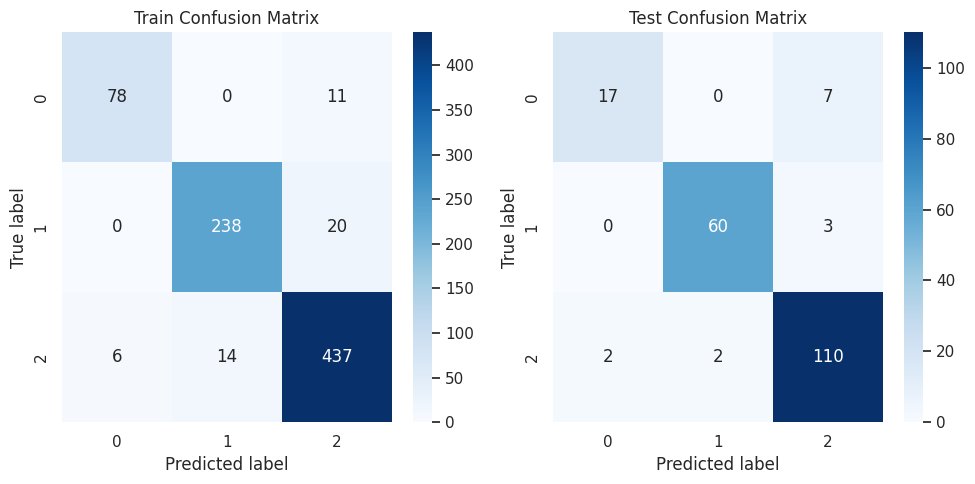

In [97]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()